In [1]:
import torch
import torchvision
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np

import random

from PIL import Image

from IPython.display import HTML

import os

In [2]:
manualSeed = 9999
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  9999


In [3]:
# dataroot = "/app/sbml/dcgan/project_data/celeba"
# dataset_name = "celeba"

dataroot = "/app/sbml/dcgan/project_data/102flowers"
dataset_name = 'flower_250_batch64'

# dataroot = '/app/sbml/hello_gan/project_data/CUB_200_2011/images'
# dataset_name = 'birds'

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 250 # 64 244

# Number of channels in the training images. For color images this is 3
nc = 3
batch_size = 64

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64
# Size of feature maps in discriminator
ndf = 64

workers = 2


# Number of training epochs
num_epochs = 100

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1


device = 'cuda' if torch.cuda.is_available() else 'cpu'

# sub directory for data
sample_dir = f"samples_{dataset_name}"
print(f"sample_dir={sample_dir}")

# Create a directory if not exists
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

sample_dir=samples_flower_250_batch64


In [4]:
torchvision.datasets.ImageFolder(root=dataroot)


dataset = torchvision.datasets.ImageFolder(root=dataroot,
                           transform=torchvision.transforms.Compose([
                               torchvision.transforms.Resize(image_size),
                               torchvision.transforms.CenterCrop(image_size),
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=workers 
)

In [5]:
len(dataset)

8189

In [6]:
len(dataloader)

128

In [7]:
real_batch = next(iter(dataloader))

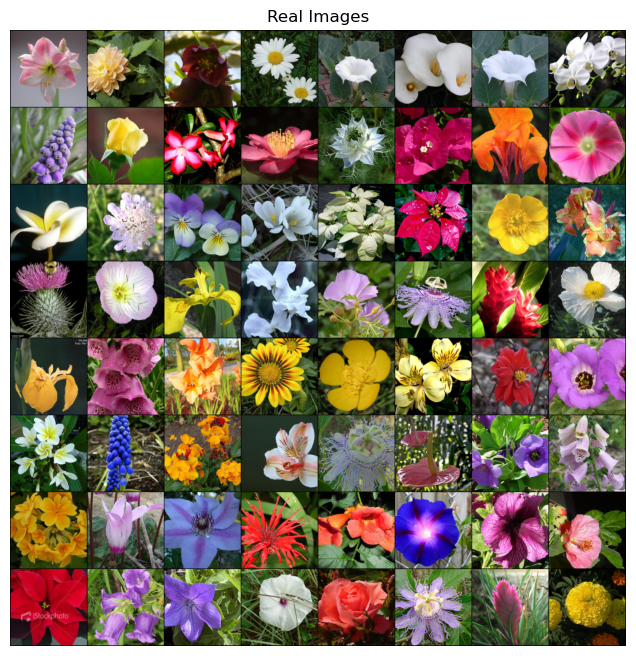

In [8]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Real Images")
plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(real_batch[0].to(device)[:64],padding=2, normalize=True).cpu(),
        (1,2,0)))


In [9]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1: # Convolutional layer
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1: # BatchNorm layer
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0)

In [10]:
ngf

64

In [11]:
# Generator Code
            # torch.nn.ConvTranspose2d(
            #   in_channels, 
            #   out_channels, 
            #   kernel_size, 
            #   stride=1, 
            #   padding=0, 
            #   output_padding=0, 
            #   groups=1, 
            #   bias=True, 
            #   dilation=1, 
            #   padding_mode='zeros', 
            #   device=None, 
            #   dtype=None)
            # input is Z, going into a convolution


# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution

            nn.ConvTranspose2d(nz, ngf*16, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*16),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf*16, ngf*12, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*12),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf*12, ngf*8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf*8, ngf*6, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*6),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf*6, ngf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*4),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(ngf*4, ngf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*2),
            nn.ReLU(True),


            nn.ConvTranspose2d(ngf*2, ngf, 2, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf, nc, 2, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        output = self.main(input)
        # print(f"SBSB) Generator: input.shape={input.shape}, output.shape={output.shape}")
        return output


# # Generate batch of latent vectors
_b_size = 1
_real_label = 1.0
_noise = torch.randn(_b_size, nz, 1, 1, device=device)
print(f"noise.shape={_noise.shape}")
# Generate fake image batch with G
_netG = Generator(ngpu).to(device)
_fake = _netG(_noise)


# Classify all fake batch with D
# output = netD(fake.detach()).view(-1)

noise.shape=torch.Size([1, 100, 1, 1])


In [12]:
netG = Generator(ngpu).to(device)

In [13]:
netG

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 768, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(768, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(512, 384, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(384, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)

In [14]:
netG.apply(weights_init)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 768, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(768, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(512, 384, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(384, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)

In [15]:
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 768, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(768, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(512, 384, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(384, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)

In [16]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 250 x 250
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf, 4, 2, 0, bias=False),
            nn.BatchNorm2d(ndf),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf, 2, 2, 0, bias=False),
            nn.BatchNorm2d(ndf),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, 1, 3, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        output = self.main(input)
        # print(f"SBSB) Discriminator: input.shape={input.shape}, output.shape={output.shape}, output={output}")
        return output


_netD = Discriminator(ngpu).to(device)
_netD.apply(weights_init)
_output = _netD(real_batch[0].to(device)).view(-1)

In [17]:
netD = Discriminator(ngpu).to(device)

In [18]:
gif_frames = []
def add_frame_to_gif(fake_images_path):
    with Image.open(fake_images_path) as frame:
        gif_frames.append(frame)
        gif_frames[0].save(f'{dataset_name}.gif', format='GIF',
                append_images=gif_frames[1:],
                save_all=True,
                duration=500, loop=1)


def denorm(x):
    # TANH [-1, 1]
    out = (x + 1) / 2
    return out.clamp(0, 1)

In [19]:
netD.apply(weights_init)
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [20]:
# Initialize BCELoss function
criterion = torch.nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
# fixed_noise = torch.randn(64, nz, 1, 1, device=device)
fixed_noise = torch.randn(image_size, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [21]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

# for SB debugging only
real_cpu = None
output = None


print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch

        errD_real = criterion(output, label)
        
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 100 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(torchvision.utils.make_grid(fake, padding=2, normalize=True))

        iters += 1

    # every epoch
    # Save real images
    if (epoch+1) == 1:
        images = real_cpu.reshape(real_cpu.size(0), nc, image_size, image_size)
        realimage_path = os.path.join(sample_dir, f'real_images.png')
        torchvision.utils.save_image(denorm(images), realimage_path)
        print(f"saved real image = {realimage_path}")

    # Save sampled images
    fake_images = fake.reshape(fake.size(0), nc, image_size, image_size)
    fake_images_path = os.path.join(sample_dir, f'fake_images_{epoch+1}.png')
    torchvision.utils.save_image(denorm(fake_images), os.path.join(fake_images_path))
    print(f"saved {fake_images_path}")
    add_frame_to_gif(fake_images_path)


# save state_dict and model
torch.save(netG.state_dict(), f'G_state_dict_{dataset_name}.pt')
torch.save(netD.state_dict(), f'D_state_dict_{dataset_name}.pt')

torch.save(netD, f'D_model_{dataset_name}.pth')
torch.save(netG, f'G_model_{dataset_name}.pth')

Starting Training Loop...
[0/100][0/128]	Loss_D: 1.3867	Loss_G: 0.6969	D(x): 0.5002	D(G(z)): 0.5004 / 0.4981
[0/100][50/128]	Loss_D: 1.1770	Loss_G: 0.8047	D(x): 0.5595	D(G(z)): 0.4491 / 0.4472
[0/100][100/128]	Loss_D: 0.8113	Loss_G: 1.0854	D(x): 0.6734	D(G(z)): 0.3402 / 0.3378
saved real image = samples_flower_250_batch64/real_images.png
saved samples_flower_250_batch64/fake_images_1.png
[1/100][0/128]	Loss_D: 0.6215	Loss_G: 1.3016	D(x): 0.7404	D(G(z)): 0.2746 / 0.2721
[1/100][50/128]	Loss_D: 0.3708	Loss_G: 1.7478	D(x): 0.8376	D(G(z)): 0.1759 / 0.1742
[1/100][100/128]	Loss_D: 0.2255	Loss_G: 2.2011	D(x): 0.8985	D(G(z)): 0.1118 / 0.1107
saved samples_flower_250_batch64/fake_images_2.png
[2/100][0/128]	Loss_D: 0.1750	Loss_G: 2.4396	D(x): 0.9206	D(G(z)): 0.0880 / 0.0872
[2/100][50/128]	Loss_D: 0.1156	Loss_G: 2.8290	D(x): 0.9472	D(G(z)): 0.0596 / 0.0591
[2/100][100/128]	Loss_D: 0.0813	Loss_G: 3.1684	D(x): 0.9627	D(G(z)): 0.0424 / 0.0421
saved samples_flower_250_batch64/fake_images_3.png
[3/

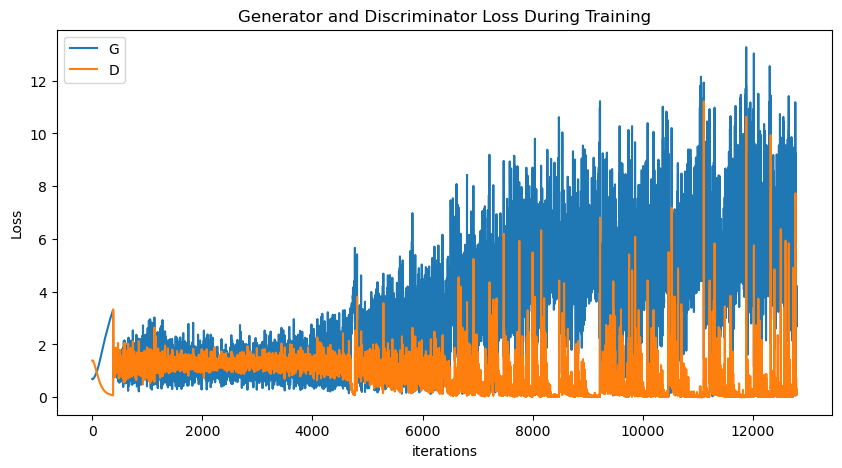

In [22]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [21]:
state_dict = torch.load("./G_state_dict_flower_250_batch64.pt")

In [22]:
generator = Generator(ngpu).to(device)

In [23]:
generator.load_state_dict(state_dict=state_dict)

<All keys matched successfully>

In [ ]:
generator.eval()
my_noise = torch.randn(1, nz, 1, 1, device=device)
fake_flower = generator(my_noise).to(device)

In [ ]:
fake_flower = fake_flower.reshape(fake_flower.size(0), nc, image_size, image_size)
fake_images_path = os.path.join(sample_dir, f'fake_images_inference_01.png')
torchvision.utils.save_image(denorm(fake_flower), os.path.join(fake_images_path))